<a href="https://colab.research.google.com/github/AbdelrahmanMO11/Climate_Change/blob/main/ClimateChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline
<div class="alert alert-block alert-danger" >

- [ 1 - Packages ](#1)
- [ 2 - Data Sets](#2)
  - [ 2.1 Global Tempreture](#2.1)
  - [ 2.2 Ozone Hole Area](#2.2)
  - [ 2.3 Green House Gases Emissions](#2.3)
  - [ 2.4 Carbon Dioxid Emissions](#2.4)
  - [ 2.5 Coal Consumption](#2.5)
  - [ 2.6 Renewable Energy](#2.6)
- [3 - summary](#3)

<div class="alert alert-block alert-info" >
<a name='1'></a>
    <h1>Packages </h1>
    
First, let's run the cell below to import all the packages that you will need during this analysis.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [Seaborn](https://seaborn.pydata.org) is a Python data visualization library based on matplotlib.
- [Pandas](https://pandas.pydata.org)  is an open source data analysis and manipulation tool.
- [Plotly](https://plotly.com/python/) is a graphing library makes interactive, publication-quality graphs.
- [sklearn](https://plotly.com/python/) formerly scikits.learn and also known as sklearn  is a free software machine learning library for the Python programming language.
</div>


In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

# Plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import matplotlib as mpl

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

mpl.rcParams['agg.path.chunksize'] = 100000
warnings.filterwarnings('ignore')

# Colors
#maroon = rgb(128,0,0)
#chocolate = rgb(210,105,30)
#sky blue = rgb(135,206,235)
#olive drab = rgb(107,142,35)
#steel blue = rgb(70,130,180)

#Loading The Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!unrar "/content/drive/MyDrive/climateData.rar"

<div class="alert alert-block alert-info" >
<a name='2'></a>
    <h1> About Dataset </h1>
In this dataset, we have include several files:
    
<h3>1. Global Temperature </h3>
    
Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):
Other files include:
Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv)
Global Land Temperatures By City (GlobalLandTemperaturesByCity.csv)
    
The raw data comes from the [Berkeley Earth data page](https://berkeleyearth.org/data/).
    
   <h3>2. Ozone Hole Area </h3>
    
The data comes from the [Kaggle](https://www.kaggle.com/datasets/suhailsh7/antarctic-ozone-hole-area).
   <h3>3. Green House Gases Emissions </h3>
    
The data comes from the [Kaggle](https://www.kaggle.com/datasets/econdata/climate-change).
    <h3>4. Carbon Dioxid Emissions </h3>
    
The data comes from the [Kaggle](https://www.kaggle.com/datasets/kkhandekar/co2-emissions-1960-2018).
    <h3>5. Coal Consumption</h3>
    
The data comes from [ourworldindata page](https://ourworldindata.org/grapher/coal-consumption-by-country-terawatt-hours-twh?tab=chart&time=1975..latest).
    <h3>6. Renewable Energy </h3>
    
The data comes from the [here](https://ourworldindata.org/grapher/renewable-energy-gen?time=1980..latest).
   </div>

each data will be approached by:

    1. Reading the data
    2. Handling Missing data
    3. Create new features (day, month, year etc.)
    4. Analysing distribution of data in time 
    5. Conclusion of the Analysis


<div class="alert alert-block alert-info" >
<a name='2.1'></a>
    <h1> 1 - Global Temperature </h1>
</div>

Some say climate change is the biggest threat of our age while others say it’s a myth based on dodgy science. We are turning some of the data over to you so you can form your own view.


Even more than with other data sets that Kaggle has featured, there’s a huge amount of data cleaning and preparation that goes into putting together a long-time study of climate trends. Early data was collected by technicians using mercury thermometers, where any variation in the visit time impacted measurements. In the 1940s, the construction of airports caused many weather stations to be moved. In the 1980s, there was a move to electronic thermometers that are said to have a cooling bias.

Given this complexity, there are a range of organizations that collate climate trends data. The three most cited land and ocean temperature data sets are NOAA’s MLOST, NASA’s GISTEMP and the UK’s HadCrut.

We have repackaged the data from a newer compilation put together by the Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from shorter time series to be included, meaning fewer observations need to be thrown away.

In this dataset, we have include several files:

Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):

* Date: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures
* LandAverageTemperature: global average land temperature in celsius
* LandAverageTemperatureUncertainty: the 95% confidence interval around the average
* LandMaxTemperature: global average maximum land temperature in celsius
* LandMaxTemperatureUncertainty: the 95% confidence interval around the maximum land temperature
* LandMinTemperature: global average minimum land temperature in celsius
* LandMinTemperatureUncertainty: the 95% confidence interval around the minimum land temperature
* LandAndOceanAverageTemperature: global average land and ocean temperature in celsius
* LandAndOceanAverageTemperatureUncertainty: the 95% confidence interval around the global average land and ocean temperature

LandMinTemperature...Uncertainty: Despite Temperature importance, equilibrium climate sensitivity is very uncertain and for many years the standard estimate has been 1.5°C to 4.5°C. 

In [ ]:
#Read the Global Temprature Data
Data_GlobalTemperatures = pd.read_csv('climateData\GlobalTemperatures.csv')
Data_GlobalTemperatures.info()
Data_GlobalTemperatures.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Read the Global Temprature Data by city
Data_GlobalLandTemperaturesByCity = pd.read_csv('climateData\GlobalLandTemperaturesByCity.csv')
Data_GlobalLandTemperaturesByCity.info()

#Make Copy for future Prediction
train_copy = Data_GlobalLandTemperaturesByCity.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [ ]:
# making a function to count the number of nulls
def null_summary(data):
    nulls_summary = pd.DataFrame(data.isnull().any(), columns=['Nulls'])   
    nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(data.isnull().sum())   
    nulls_summary['Num_of_nulls [%]'] = round((data.isnull().mean()*100),2)   
    print(nulls_summary) 
copy = Data_GlobalTemperatures.copy()
    
#brief look on the Missing data
null_summary(Data_GlobalTemperatures)    

                                           Nulls  Num_of_nulls [qty]  \
dt                                         False                   0   
LandAverageTemperature                      True                  12   
LandAverageTemperatureUncertainty           True                  12   
LandMaxTemperature                          True                1200   
LandMaxTemperatureUncertainty               True                1200   
LandMinTemperature                          True                1200   
LandMinTemperatureUncertainty               True                1200   
LandAndOceanAverageTemperature              True                1200   
LandAndOceanAverageTemperatureUncertainty   True                1200   

                                           Num_of_nulls [%]  
dt                                                     0.00  
LandAverageTemperature                                 0.38  
LandAverageTemperatureUncertainty                      0.38  
LandMaxTemperature             

In [ ]:
# Missing data with listwise deletion
# Because data is missing in chucks and we are dealing with time series data, we will delete all rows that have at least 
# one missing value.
Data_GlobalTemperatures.dropna(axis = 0, inplace = True)

# Dealing with the DATE
Data_GlobalTemperatures['Date'] = pd.to_datetime(Data_GlobalTemperatures.dt) # converted all dates to the same format
data2 = Data_GlobalTemperatures.copy() # create a new dataset
data2.drop(columns = ['dt'], axis = 1, inplace = True) # drop the dt column

# Creating new features
data2['day'] = data2['Date'].dt.day
data2['week'] = data2['Date'].dt.week
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year

# Week data is not evenly distributed
data2['week'].value_counts() # very uneven information on weeks

# For future analysis, we will work only on yearly data, as average (because there are dates missing and data is not consistent)
earth_data = data2.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()

earth_data['turnpoint'] = np.where(earth_data['year'] <= 1975, 'before', 'after') # creating a new columns
earth_data.head(2)
# Simple Summary Statistics
earth_data[['LandAverageTemperature', 'LandMaxTemperature', 
       'LandMinTemperature', 'LandAndOceanAverageTemperature']].describe()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
count,166.000000,166.000000,166.000000,166.000000
mean,8.571583,14.350601,2.743595,15.212566
std,0.473687,0.447741,0.614124,0.298629
min,7.558583,13.081000,1.525083,14.740083
25%,8.195708,14.055917,2.262562,14.991208
50%,8.540750,14.307708,2.734917,15.144208
75%,8.791250,14.539167,3.126833,15.379104
max,9.831000,15.572667,4.148833,16.058583


In [ ]:
#adding a Year and Data columns
Data_GlobalTemperatures['Date'] = pd.to_datetime(Data_GlobalTemperatures.dt) 
Data_GlobalLandTemperaturesByCity['Date'] = pd.to_datetime(Data_GlobalLandTemperaturesByCity.dt) 
Data_GlobalTemperatures['year']=Data_GlobalTemperatures['Date'].dt.year
Data_GlobalLandTemperaturesByCity['year']=Data_GlobalLandTemperaturesByCity['Date'].dt.year

In [ ]:
#the data on 1850
Data_GlobalLandTemperaturesByCity1=Data_GlobalLandTemperaturesByCity[Data_GlobalLandTemperaturesByCity['year']==1850]
Data_GlobalLandTemperaturesByCity1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Date,year
1274,1850-01-01,-5.265,1.820,Århus,Denmark,57.05N,10.33E,1850-01-01,1850
1275,1850-02-01,1.859,1.641,Århus,Denmark,57.05N,10.33E,1850-02-01,1850
1276,1850-03-01,0.032,3.167,Århus,Denmark,57.05N,10.33E,1850-03-01,1850
1277,1850-04-01,5.764,1.903,Århus,Denmark,57.05N,10.33E,1850-04-01,1850
1278,1850-05-01,11.037,0.586,Århus,Denmark,57.05N,10.33E,1850-05-01,1850


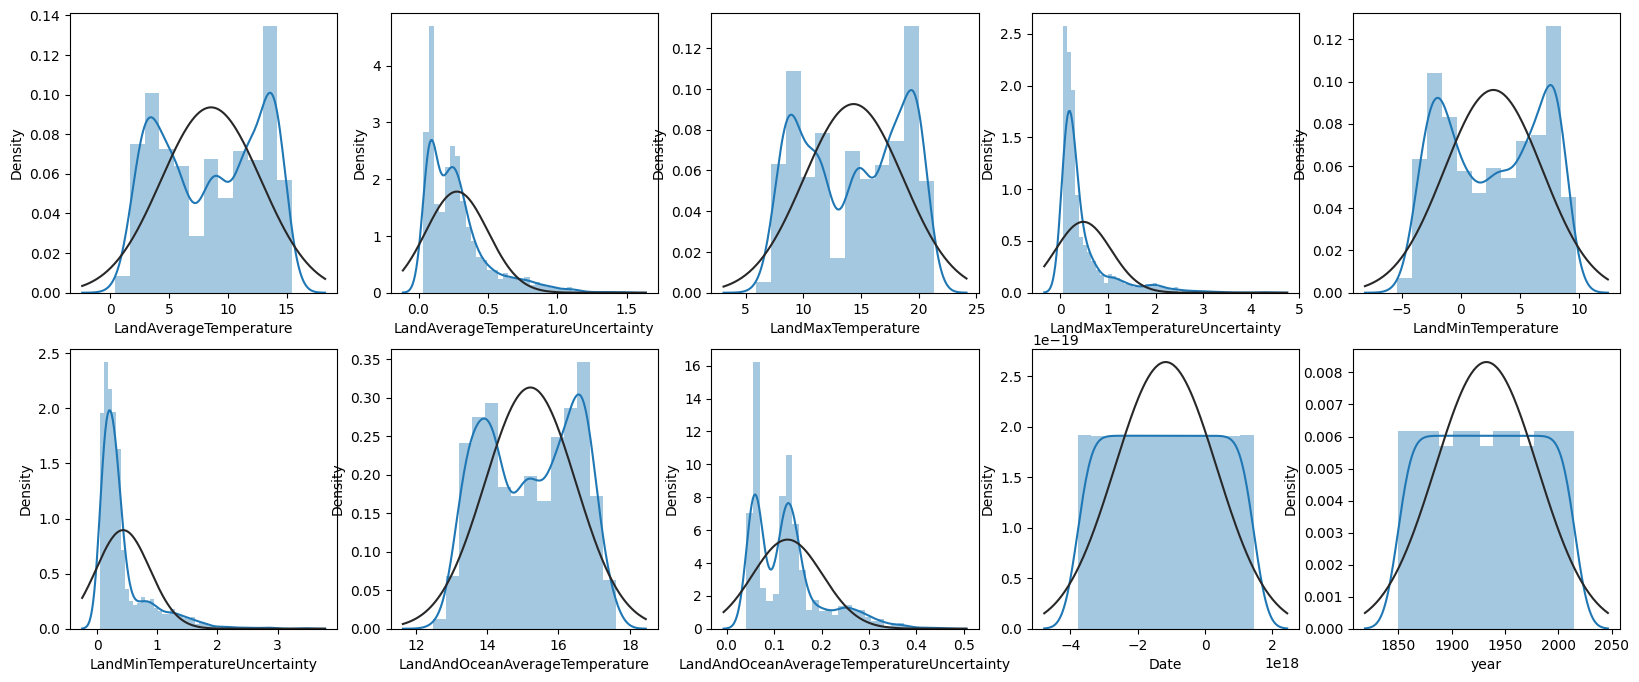

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,8))
z=1
for i in Data_GlobalTemperatures.columns:
    if(Data_GlobalTemperatures[i].dtypes!='object'):
        plt.subplot(2,5,z)
        sns.distplot(Data_GlobalTemperatures[i], fit=norm);
        z=z+1

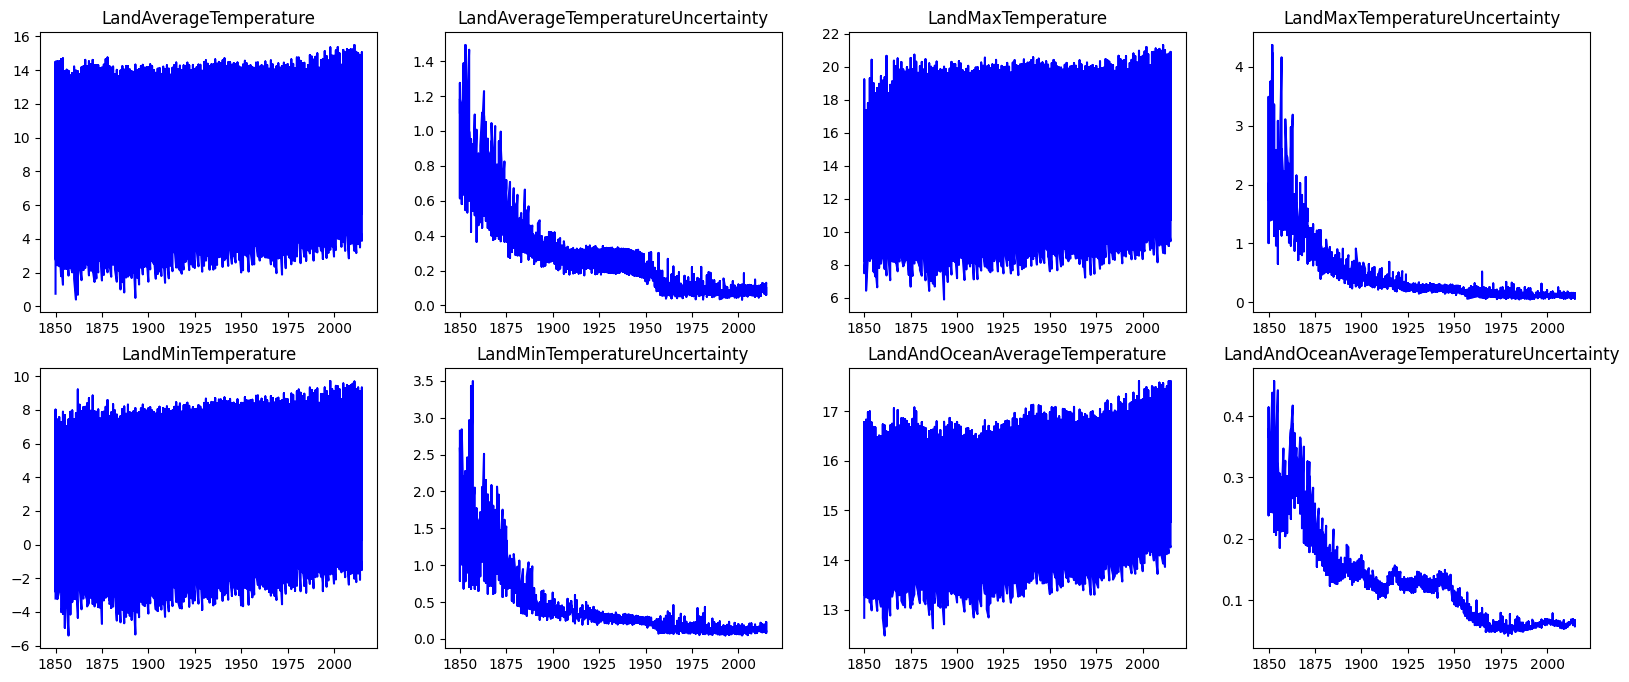

In [ ]:
fig, ax = plt.subplots(2,4,figsize=(20,8))
z=1

for i in list(Data_GlobalTemperatures.select_dtypes(exclude=['object']).columns)[:-2]:
        plt.subplot(2,4,z)
        plt.plot(Data_GlobalTemperatures['year'],Data_GlobalTemperatures[i],c='b')
        plt.title(i)

        z=z+1

In [ ]:
#groub the data by the Year
group_Data_GlobalTemperatures = Data_GlobalTemperatures.groupby('year')[['LandAverageTemperature','LandAverageTemperatureUncertainty'
                                                                  ,'LandMaxTemperature','LandMaxTemperatureUncertainty',
                                                                  'LandMinTemperature','LandMinTemperatureUncertainty',
                                                                  'LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()
group_Data_GlobalLandTemperaturesByCity = Data_GlobalLandTemperaturesByCity.groupby('year')[['AverageTemperatureUncertainty','AverageTemperature']].mean().reset_index()
group_Data_GlobalTemperatures.set_index(['year'], inplace=True)
group_Data_GlobalLandTemperaturesByCity.set_index(['year'], inplace=True)

In [ ]:
# Calculating the count of confirmed cases by country
countries = np.unique(train_copy['Country'])
mean_conf = []
for country in countries:
    mean_conf.append(train_copy[train_copy['Country'] == country]['AverageTemperature'].mean())
    
# Building the dataframe
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_conf,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Count')
            )
       ]
    
# Building the visual
layout = dict(
    title = 'AverageTemperature of each country',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [ ]:
group_Data_GlobalTemperatures

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
year,,,,,,,,
1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167
1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083
1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417
1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833
1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417
...,...,...,...,...,...,...,...,...
2011,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000
2012,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500
2013,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667


In [ ]:
# Creating the graph
fig = go.Figure()
fig.update_layout(title="AverageTemperature: 1743-2013", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = group_Data_GlobalLandTemperaturesByCity.index, y = group_Data_GlobalLandTemperaturesByCity['AverageTemperature'], mode = 'lines',
                        name = 'Avg Temp', marker_color='rgb(128, 0, 0)'))

fig.add_trace(go.Scatter(x = group_Data_GlobalLandTemperaturesByCity.index, y = group_Data_GlobalLandTemperaturesByCity['AverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Avg Temp Error', marker_color = 'rgb(107,142,35)'))

In [ ]:

# Creating the graph
fig = go.Figure()
fig.update_layout(title="Land Average Temperature: 1743-2013", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = group_Data_GlobalTemperatures.index, y = group_Data_GlobalTemperatures['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'))

fig.add_trace(go.Scatter(x = group_Data_GlobalTemperatures.index, y = group_Data_GlobalTemperatures['LandAverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(107,142,35)'))

Text(0.5, 1.0, 'Max Average Temperature For Countries')

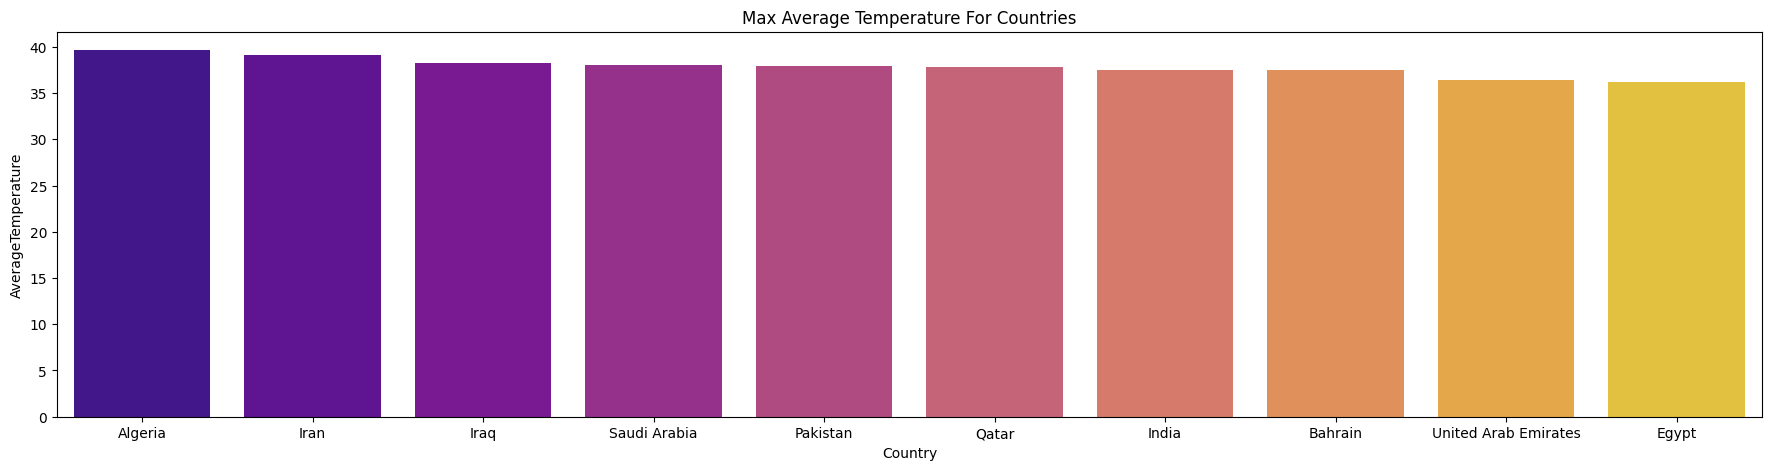

In [ ]:
G7=Data_GlobalLandTemperaturesByCity[['AverageTemperature','AverageTemperatureUncertainty','Country']].groupby(['Country'],as_index=False).max().sort_values(by='AverageTemperature',ascending=False)
plt.figure(figsize=(22, 5))
sns.barplot(x ='Country', y ='AverageTemperature', data = G7[:10],  
            palette ='plasma')
plt.title('Max Average Temperature For Countries')

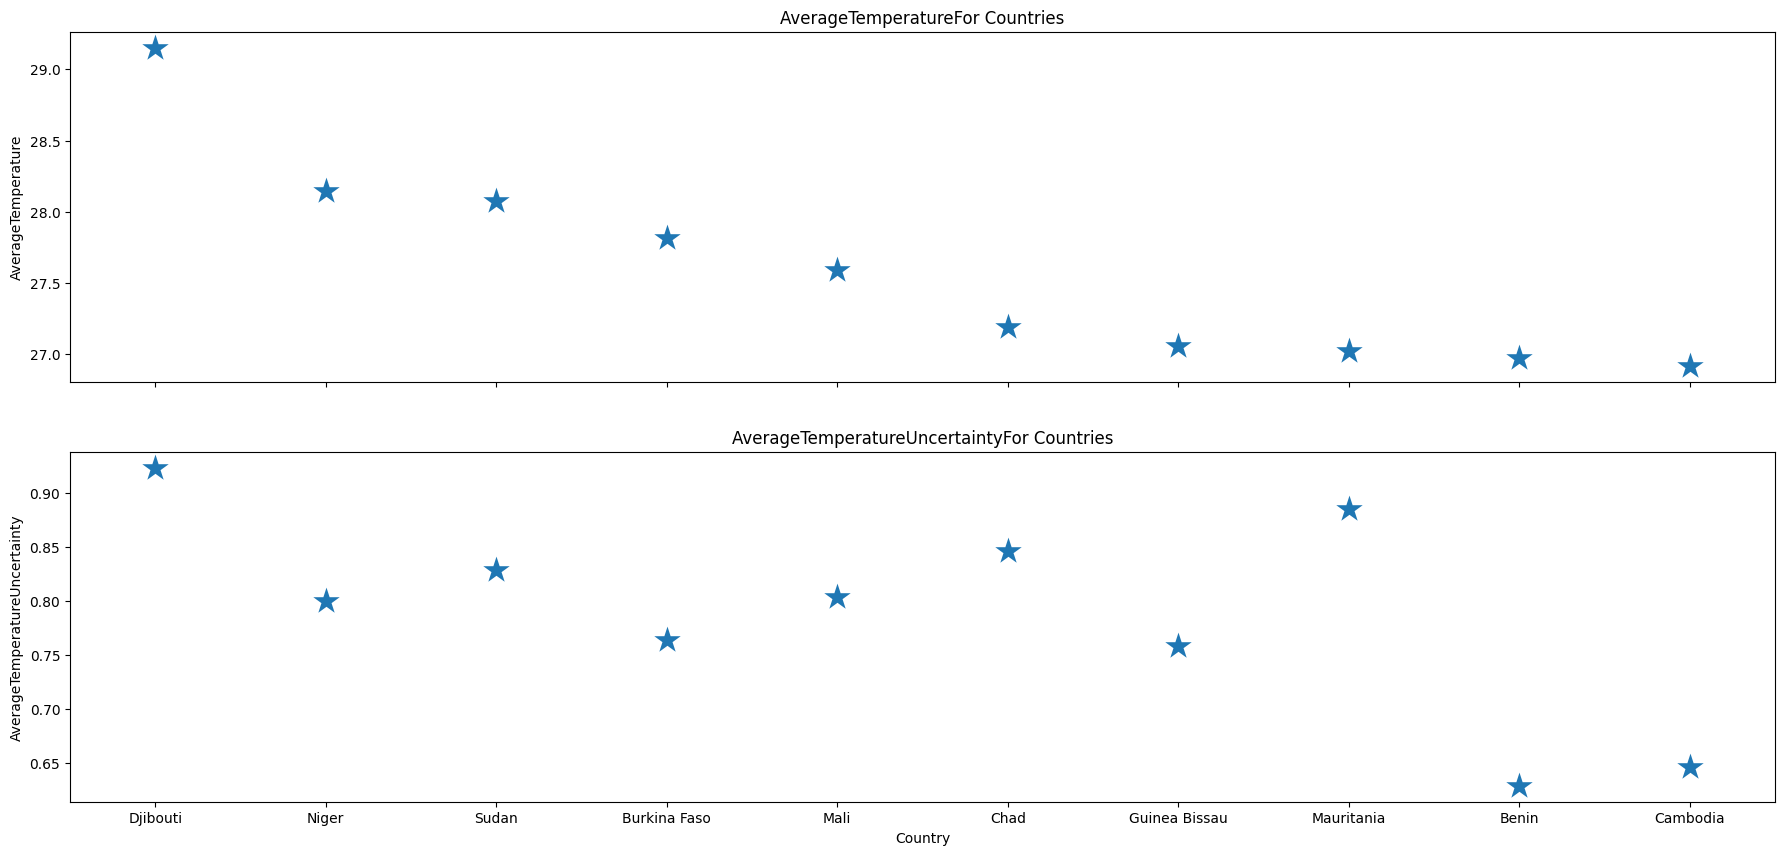

In [ ]:
group_Data_GlobalLandTemperaturesByCity_Country = Data_GlobalLandTemperaturesByCity.groupby('Country').mean().reset_index()
group_Data_GlobalLandTemperaturesByCity_Country=group_Data_GlobalLandTemperaturesByCity_Country.sort_values(by='AverageTemperature',ascending=False)
fig, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
for name, ax in zip(['AverageTemperature','AverageTemperatureUncertainty'], axes):
    sns.stripplot(data=group_Data_GlobalLandTemperaturesByCity_Country[:10], x='Country', y=name, ax=ax, size=20,marker="*")#stripplot
    ax.set_title(name+'For Countries')

In [ ]:
# Figure layout
fig = make_subplots(rows=1, cols=1, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="When Global Warming Started?",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Figure data
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)


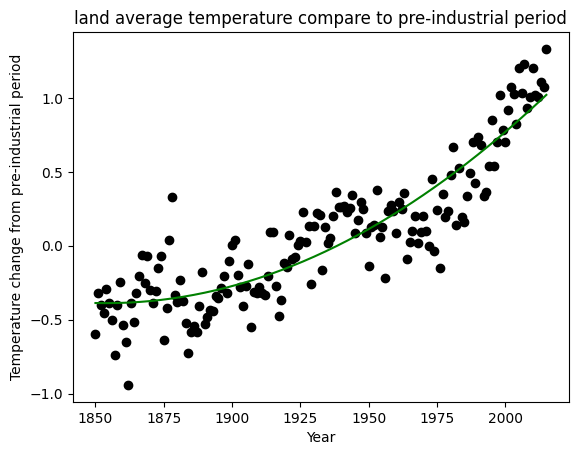

In [ ]:
#adding a column to compare the average tempreture to the pre-industrial period
earth_data['LandAverageTemperature change'] = (earth_data['LandAverageTemperature']-8.5)

#make a Polynomial regeression module to predict the the changes in tempreture
X = earth_data.iloc[:,:1].values
y = earth_data.iloc[:,-1:].values
poly_reg= PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)

plt.scatter(X,y,color='black')
plt.plot(X,lin_reg.predict(X_poly),color='green')
plt.title("land average temperature compare to pre-industrial period")
plt.xlabel("Year")
plt.ylabel("Temperature change from pre-industrial period")
plt.show()

In [ ]:
print(lin_reg.predict(poly_reg.fit_transform([[2020]])))
print(lin_reg.predict(poly_reg.fit_transform([[2100]])))

[[1.10895558]]
[[2.89849127]]


## conclusion 1
Judging from the prediction and the data the average tempreture is increaing in a high base.
The rate of warming since 1981 is more than twice as fast: 0.32° F (0.18° C) per decade.

the module predict that the Average Land Tempreture in 2100 is 2.9° C

- Limiting the warming to 1.5 degrees was the most ambitious goal of the Paris agreement but we are not likely to meet it.

So we need to our hands on the reasons and act fast.

<div class="alert alert-block alert-info" >
<a name= '2.2'></a>
    <h1> 2 - Ozone Hole Area </h1>
    the depletion of the ozone layer was the main reason of climate change since the late 1970s but now no one talk about it.<br>
    The main causes of ozone depletion and the ozone hole are manufactured chemicals,<br> especially manufactured halocarbon refrigerants, solvents, propellants,<br> and foam-blowing agents (chlorofluorocarbons (CFCs), HCFCs, halons).
</div>

In [ ]:
# Read the data
ozone_data = pd.read_csv("climateData/antarctic-ozone-hole-area.csv")
ozone_data.info()
null_summary(ozone_data)
ozone_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          41 non-null     object 
 1   Code                            41 non-null     object 
 2   Year                            41 non-null     int64  
 3   Maximum ozone hole area (NASA)  41 non-null     float64
 4   Mean ozone hole area            41 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.7+ KB
                                Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
Entity                          False                   0               0.0
Code                            False                   0               0.0
Year                            False                   0               0.0
Maximum ozone hole area (NASA)  False                   0               0.0
Mean ozone hole area         

,Entity,Code,Year,Maximum ozone hole area (NASA),Mean ozone hole area
0,World,OWID_WRL,1979,1100000.0,100000
1,World,OWID_WRL,1980,3300000.0,1400000
2,World,OWID_WRL,1981,3100000.0,600000
3,World,OWID_WRL,1982,10800000.0,4800000
4,World,OWID_WRL,1983,12200000.0,7900000


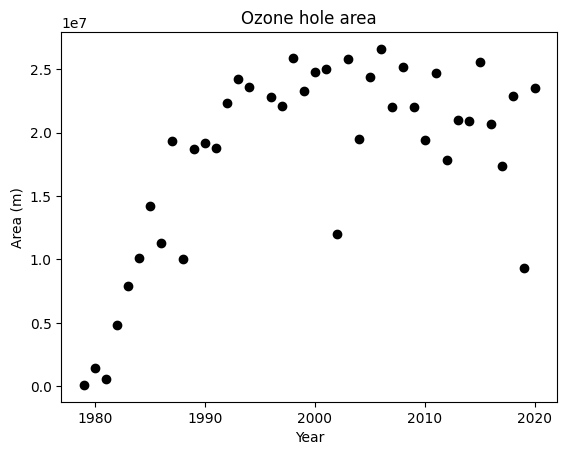

In [ ]:
plt.scatter(ozone_data.iloc[:,2:3].values,ozone_data.iloc[:,4:5].values,color='black')
plt.title("Ozone hole area")
plt.xlabel("Year")
plt.ylabel("Area (m)")
plt.show()

## Conclusion 2
the ozone layer start recovering after 1990 because of Montreal Protocol in 1987.

which bans the production of CFCs, halons, and other ozone-depleting chemicals. Currently,scientists plan to develop a new refrigerant to replace the old one Which is Hydrofluorocarbons (HFCs)

The ban came into effect in 1989. Ozone levels stabilized by the mid-1990s and began to recover in the 2000s, as the shifting of the jet stream in the southern hemisphere towards the south pole has stopped and might even be reversing.

The HFCs do not harm the ozone layer as much as the compounds they replace, but they do contribute to global warming, with trifluoromethane having 11,700 times the warming potential of carbon dioxide. Their atmospheric concentrations and contribution to anthropogenic greenhouse gas emissions are rapidly increasing, causing international concern about their radiative forcing.

<div class="alert alert-block alert-info" >
<a name='2.3'></a>
    <h1> 3 - Green House Gases Emissions </h1>
A greenhouse gas (GHG or GhG) is a gas that absorbs and emits radiant energy within the thermal infrared range, causing the greenhouse effect The primary greenhouse gases in Earth's atmosphere are water vapor (H2O), carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O).(CFC-11),(CFC-12)<br>
</div>

In [ ]:
# Read the data
GHG_data = pd.read_csv("climateData/GHG_emissions.csv")
GHG_data.info()
null_summary(GHG_data)
GHG_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB
          Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
Year      False                   0               0.0
Month     False                   0               0.0
MEI       False                   0               0.0
CO2       False                   0               0.0
CH4       False                   0               0.0
N2O       Fal

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [ ]:
# Creating the graph
fig = go.Figure()
fig.update_layout(title="Greenhouse Gas  Emissions: 1985-2008", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=20,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')


fig.add_trace(go.Scatter(x = GHG_emissions['Year'], y = GHG_emissions['CO2'], mode = 'lines',
                        name = 'CO2', marker_color = 'rgb(107,142,35)'))


fig.add_trace(go.Scatter(x = GHG_emissions['Year'], y = GHG_emissions['N2O'], mode = 'lines',
                        name = 'Nitrous oxide ', marker_color = 'rgb(98,52,35)'))

fig.add_trace(go.Scatter(x = GHG_emissions['Year'], y = GHG_emissions['CFC-11'], mode = 'lines',
                        name = 'CFC-11', marker_color = 'rgb(60,142,35)'))
fig.add_trace(go.Scatter(x = GHG_emissions['Year'], y = GHG_emissions['CFC-12'], mode = 'lines',
                        name = 'CFC-12', marker_color = 'rgb(12,142,35)'))



fig.add_trace(go.Scatter(x = GHG_emissions['Year'], y = GHG_emissions['Aerosols'], mode = 'lines',
                        name = 'Aerosols', marker_color = 'rgb(107,40,255)'))



In [ ]:
# Creating the graph
fig = go.Figure()
fig.update_layout(title="Greenhouse Gas  Emissions: 1985-2008", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=20,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = GHG_emissions['Year'], y = GHG_emissions['CH4'], mode = 'lines',
                        name = 'Methane', marker_color = 'rgb(0,5,35)'))
fig.add_trace(go.Scatter(x = GHG_emissions['Year'], y = GHG_emissions['TSI'], mode = 'lines',
                        name = 'Total Solar Irradiance', marker_color = 'rgb(64,142,98)'))

In [ ]:
#group the data by the year
GHG_data2 = GHG_data.groupby(by='Year').mean().reset_index()
GHG_data2.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,8.5,0.959000,342.868750,1645.200000,303.880250,193.986750,356.361250,1366.173587,0.065738,0.136500
1,1984,6.5,-0.150667,344.580000,1656.119167,304.702333,201.166833,367.793833,1365.823817,0.030158,-0.018667
2,1985,6.5,-0.397750,346.041667,1668.886667,305.239750,212.858167,383.306750,1365.643333,0.012633,-0.037083
3,1986,6.5,0.448917,347.384167,1682.555833,306.449583,223.766250,402.760083,1365.652083,0.013567,0.034083
4,1987,6.5,1.648667,349.160833,1693.730000,306.055167,234.715250,423.272917,1365.796317,0.010333,0.177833


In [ ]:
#make new columns to compare the data to 1983
GHG_data2['CO2 relative'] = (GHG_data2['CO2'] - GHG_data2['CO2'][0])/GHG_data2['CO2'][0]
GHG_data2['CH4 relative'] = (GHG_data2['CH4'] - GHG_data2['CH4'][0])/GHG_data2['CH4'][0]
GHG_data2['N2O relative'] = (GHG_data2['N2O'] - GHG_data2['N2O'][0])/GHG_data2['N2O'][0]
GHG_data2['CFC-11 relative'] = (GHG_data2['CFC-11'] - GHG_data2['CFC-11'][0])/GHG_data2['CFC-11'][0]
GHG_data2['CFC-12 relative'] = (GHG_data2['CFC-12'] - GHG_data2['CFC-12'][0])/GHG_data2['CFC-12'][0]
GHG_data2.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,CO2 relative,CH4 relative,N2O relative,CFC-11 relative,CFC-12 relative
0,1983,8.5,0.959000,342.868750,1645.200000,303.880250,193.986750,356.361250,1366.173587,0.065738,0.136500,0.000000,0.000000,0.000000,0.000000,0.000000
1,1984,6.5,-0.150667,344.580000,1656.119167,304.702333,201.166833,367.793833,1365.823817,0.030158,-0.018667,0.004991,0.006637,0.002705,0.037013,0.032081
2,1985,6.5,-0.397750,346.041667,1668.886667,305.239750,212.858167,383.306750,1365.643333,0.012633,-0.037083,0.009254,0.014397,0.004474,0.097282,0.075613
3,1986,6.5,0.448917,347.384167,1682.555833,306.449583,223.766250,402.760083,1365.652083,0.013567,0.034083,0.013170,0.022706,0.008455,0.153513,0.130202
4,1987,6.5,1.648667,349.160833,1693.730000,306.055167,234.715250,423.272917,1365.796317,0.010333,0.177833,0.018351,0.029498,0.007157,0.209955,0.187764


In [ ]:
# Figure layout
fig = make_subplots(rows=2, cols=1, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Green House Gas emissions and relative to the measures in 1983  ", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

#============================= Scatter =============================
fig.add_trace(go.Scatter(x = GHG_data2['Year'], y = GHG_data2['CO2'], mode = 'lines',
                         name = 'CO2', marker_color= 'rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = GHG_data2['Year'], y = GHG_data2['CH4'], mode = 'lines',
                        name = 'CH4', marker_color='rgb(210,105,30)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = GHG_data2['Year'], y = GHG_data2['N2O'], mode = 'lines',
                        name = 'N2O', marker_color='rgb(135,206,235)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = GHG_data2['Year'], y = GHG_data2['CFC-11'], mode = 'lines',
                        name = 'CFC-11', marker_color='rgb(107,142,35)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = GHG_data2['Year'], y = GHG_data2['CFC-12'], mode = 'lines',
                        name = 'CFC-12', marker_color='rgb(70,130,180)'), row = 1, col = 1)
#============================= Scatter =============================
fig.add_trace(go.Scatter(x = GHG_data2['Year'], y = GHG_data2['CO2 relative'], mode = 'lines',
                         name = 'CO2', marker_color= 'rgb(128, 0, 0)'), row = 2, col = 1)
fig.add_trace(go.Scatter(x = GHG_data2['Year'], y = GHG_data2['CH4 relative'], mode = 'lines',
                        name = 'CH4', marker_color='rgb(210,105,30)'), row = 2, col = 1)
fig.add_trace(go.Scatter(x = GHG_data2['Year'], y = GHG_data2['N2O relative'], mode = 'lines',
                        name = 'N2O', marker_color='rgb(135,206,235)'), row = 2, col = 1)
fig.add_trace(go.Scatter(x = GHG_data2['Year'], y = GHG_data2['CFC-11 relative'], mode = 'lines',
                        name = 'CFC-11', marker_color='rgb(107,142,35)'), row = 2, col = 1)
fig.add_trace(go.Scatter(x = GHG_data2['Year'], y = GHG_data2['CFC-12 relative'], mode = 'lines',
                        name = 'CFC-12', marker_color='rgb(70,130,180)'), row = 2, col = 1)

## Conclusion 3
CFC-11 – trichlorofluoromethane is one of a number of chlorofluorocarbons (CFC) chemicals that were initially developed as refrigerants during the 1930s.The international community agreed the Montreal Protocol in 1987 which outlawed chlorofluorocarbons for almost all uses. The Montreal Protocol on Substances that Deplete the Ozone Layer is an important Multilateral Agreement regulating the production, consumption, and emissions of ozone-depleting substances (ODSs).

CFC-12 (also known by the trade name Freon or Freon-12) is an ozone-depleting refrigerant and potent greenhouse gas that was widely used in air conditioners for automobiles and trucks for over 30 years, up until the mid-1990s. While use of CFC-12 in new vehicles has been banned since 1994, some vehicles built before then may still use it if they have not already been retrofitted to a non-ozone depleting refrigerant and they are still on the road.

<div class="alert alert-block alert-info" >
<a name='2.4'></a>
    <h1> 4 - Carbon Dioxid Emissions </h1>
The amount of CO2 in the atmosphere is widely believed to be responsible for global warming due to human activity.
</div>

In [ ]:
CO2_data = pd.read_csv('climateData/CO2_Emissions_1960-2018.csv', index_col='Country Name')
CO2_data1 = CO2_data.transpose()
CO2_data1.index = pd.to_datetime(CO2_data1.index).year
CO2_data1.dropna(axis=1 , inplace = True)
CO2_data1.head()

Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Antigua and Barbuda,Australia,...,Upper middle income,Uruguay,United States,St. Vincent and the Grenadines,"Venezuela, RB",Vietnam,World,Samoa,"Yemen, Rep.",South Africa
1960,0.906060,0.046057,0.090880,0.100835,1.258195,0.609268,0.119037,2.383343,0.677418,8.582937,...,2.573291,1.701585,15.999779,0.135865,7.009414,0.181947,3.121158,0.135031,0.011038,5.727223
1961,0.922474,0.053589,0.095283,0.082204,1.374186,0.662618,0.109136,2.458551,0.866667,8.641569,...,2.408432,1.602728,15.681256,0.133884,6.153191,0.183099,3.068090,0.163542,0.013599,5.832621
1962,0.930816,0.073721,0.096612,0.210533,1.439956,0.727117,0.163542,2.538447,1.838457,8.835688,...,2.370116,1.540660,16.013937,0.132162,6.188716,0.217694,3.114839,0.158377,0.012729,5.887168
1963,0.940570,0.074161,0.112376,0.202739,1.181681,0.853116,0.175833,2.330685,1.487469,9.226440,...,2.435563,1.639287,16.482762,0.174204,6.208593,0.196997,3.221195,0.184037,0.014518,5.961337
1964,0.996033,0.086174,0.133258,0.213562,1.111742,0.972381,0.132815,2.553442,1.590448,9.759073,...,2.523331,1.710104,16.968119,0.215409,6.041541,0.209870,3.324046,0.208106,0.017550,6.332343


In [ ]:
#figure of CO2 Emissions in the world
line = px.line(data_frame= CO2_data1, x = CO2_data1.index,y =["World"] , markers = True)
line.update_traces(line_color="red")
line.update_yaxes(title_text = 'CO2 emissions (metric tons per capita)')
line.update_xaxes(title_text = 'Year',
    rangeslider_visible = False)
line.update_layout(legend=dict(title="Country"),
                  showlegend = True,
    title = {
        'text': 'CO2 Emissions World Wide',
        'y':0.94,
        'x':0.53,
        'xanchor': 'center',
        'yanchor': 'top'},
                   template = "plotly_white"),

line.show()

The UK’s CO2 emissions peaked in the year 1973 and have declined by around 38% since 1990, faster than any other major developed country.

Here, Carbon Brief presents detailed analysis of the reasons behind the decline in UK CO2 since 1990. The most significant factors include a cleaner electricity mix based on gas and renewables instead of coal, as well as falling demand for energy across homes, businesses and industry.

Declines in the UK’s CO2 have persisted despite an economic recovery from the financial crisis a decade ago. Where earlier reductions were largely negated by rising imports, the past decade has seen genuine cuts in the amount of CO2 for which the UK is responsible.

The factors driving emission reductions will likely continue into the future as the UK’s remaining coal use is phased out by 2025.

In [ ]:
CO2_data.reset_index(level=0, inplace=True)
CO2_data2 = CO2_data.melt(id_vars=['Country Name'], var_name='Year').sort_values(by=['Year'])
CO2_data2.head()

,Country Name,Year,value
0,Aruba,1960,204.631696
169,Malaysia,1960,0.437450
170,North America,1960,15.529995
171,Namibia,1960,NaN
172,New Caledonia,1960,10.908165


Carbon dioxide (CO2) in the atmosphere is now reaching levels 50% higher than when humanity began large-scale burning of fossil fuels during the industrial revolution.

Recent measurements from the Mauna Loa observatory in Hawaii show that for several days in February and March 2021, atmospheric CO2 levels exceeded 417 parts per million (ppm). Pre-industrial levels were about 278ppm.


Systematic long-term measurements of atmospheric CO2 were started in 1958 by Charles David Keeling at the Mauna Loa Observatory in Hawaii.

**Since then, additional measurement sites around the world have enabled the global average CO2 concentration to be estimated. In combination with the ice core data, these records show several important things.**

* First, the annual average CO2 concentration is increasing year-on-year. This is mainly due to the burning of fossil fuels, with further contributions from deforestation.

* Second, as human-driven emissions have increased, the rise in CO2 has accelerated. It took over 200 years to reach a 25% increase by 1986. By 2011 – 25 years later – the increase reached 40%. 

# ![image.png](attachment:image.png)

CO2 emissions and energy from industrial activities
Before the 1900s, coal was the main source of energy, but in the 1900s, CO2 emissions from coal began to rise rapidly due to population growth. Then, in the 1930s, cement production and oil were introduced as industrial activities, and CO2 emissions increased rapidly. This is more than a tenfold increase when compared to the 1900s and 1990s.

### Atmospheric concentration of carbon dioxide and methane
These have also increased explosively since the 1900s. The increase in the concentration of methane gas is strongly influenced by human dietary habits. This is due in part to the fact that methane production in rice cultivation and meat consumption in the world has dramatically doubled since the end of 1900 due to population growth and the rise in median capital.

Storage of carbon dioxide gas
Land plants take in about 100 billion tons of carbon per year into their bodies through photosynthesis. About 50% of this carbon is released through respiration, and the rest is returned to the atmosphere through mortality. As the amount of carbon dioxide released by combustion increases, it is necessary to increase the amount of vegetation to match the increase, and energy plantations are required. However, if forests are rapidly diminishing due to industrial activities, the balance between this storage and release will be broken, and the release of carbon into the atmosphere will prevail. This will accelerate global warming as described above.

In other words, due to the rapid and random exploitation of energy caused by the explosive increase in the number of human beings, and due to the influence of products and mass production and mass consumption generated by the universalization of capitalism, the balance of exhaust heat in the global environment has completely collapsed, and this balance has been dramatically shifting in recent years. The current situation is that the balance has been dramatically shifting in recent years, and the time has come to rethink various issues, including politics and economics, in order to curb these problems.

In [ ]:
m=CO2_data.fillna(value=0).sum(axis=0)[1:]
m=m.reset_index()
m.columns=['year','World']

line = px.line(data_frame=m, x = 'year',y ='World' , markers = True)
line.update_traces(line_color="red")
line.update_yaxes(title_text = 'CO2 emissions Sum(metric tons per capita)')
line.update_xaxes(title_text = 'Year',
    rangeslider_visible = False)
line.update_layout(legend=dict(title="Country"),
                  showlegend = True,
    title = {
        'text': 'CO2 Emissions World Wide',
        'y':0.94,
        'x':0.53,
        'xanchor': 'center',
        'yanchor': 'top'},
                   template = "plotly_white"),

line.show()

In [ ]:
CO2_data2[CO2_data2['Country Name']!='World']

,Country Name,Year,value
0,Aruba,1960,204.631696
169,Malaysia,1960,0.437450
170,North America,1960,15.529995
171,Namibia,1960,NaN
172,New Caledonia,1960,10.908165
...,...,...,...
15522,Guyana,2018,3.132193
15523,High income,2018,10.254533
15524,"Hong Kong SAR, China",2018,NaN
15510,Georgia,2018,2.538542


In [ ]:
px.choropleth(data_frame=CO2_data2[CO2_data2['Country Name']!='World'],
              locationmode='country names',locations='Country Name',
              color='value', animation_frame='Year',
              title='CO2 Emission by Countries by Year',
              color_continuous_scale=px.colors.sequential.RdBu_r,
              range_color=(200, 0))

## Conclusion 4
The UK’s CO2 emissions peaked in the year 1973 and have declined by around 38% since 1990, faster than any other major developed country.

Here, Carbon Brief presents detailed analysis of the reasons behind the decline in UK CO2 since 1990. The most significant factors include a cleaner electricity mix based on gas and renewables instead of coal, as well as falling demand for energy across homes, businesses and industry.

Declines in the UK’s CO2 have persisted despite an economic recovery from the financial crisis a decade ago. Where earlier reductions were largely negated by rising imports, the past decade has seen genuine cuts in the amount of CO2 for which the UK is responsible.


<div class="alert alert-block alert-info" >
<a name='2.5'></a>
    <h1> 4 - Coal Consumption</h1>
The coal consumption is one of the major reasons of the increase in the CO2 emissions 
</div>

In [ ]:
coal_data = pd.read_csv("climateData/coal-consumption-by-country-terawatt-hours-twh.csv")
coal_data.info()
null_summary(coal_data)
coal_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  5584 non-null   object 
 1   Code                    4273 non-null   object 
 2   Year                    5584 non-null   int64  
 3   Coal Consumption - TWh  5584 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 174.6+ KB
                        Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
Entity                  False                   0              0.00
Code                     True                1311             23.48
Year                    False                   0              0.00
Coal Consumption - TWh  False                   0              0.00


,Entity,Code,Year,Coal Consumption - TWh
0,Africa,NaN,1965,323.49612
1,Africa,NaN,1966,323.12220
2,Africa,NaN,1967,330.29156
3,Africa,NaN,1968,343.51290
4,Africa,NaN,1969,346.64294


**Why does world coal demand tend to increase?**
 
* The main reason: Coal is the fuel that produces 38% of electricity worldwide. Increasing demand for electricity naturally increases coal consumption. In the article "How to explain the trend of more used coal in the world?" posted on The Conversation website, economist Carine Sebi of the Management University of Grenoble, France (GEM) said two-thirds of coal is used to produce electricity, the rest is for industry, mainly metallurgy industry.
* Carine Sebi, an expert with data sources from energy-intensive research agency Enerdata, said that in the period of 2010-2017, coal consumption for electricity production increased in direct proportion to overall electricity consumption. , respectively 2.8% / year and 3% / year.

In [ ]:
coal_data1 = coal_data.groupby(by='Year').sum().reset_index()
coal_data1.head()


line = px.line(data_frame=coal_data1, x = 'Year',y ='Coal Consumption - TWh' , markers = True)
line.update_traces(line_color="red")
line.update_yaxes(title_text = 'Coal Consumption - TWh Sum(metric tons per capita)')
line.update_xaxes(title_text = 'Year',
    rangeslider_visible = False)
line.update_layout(legend=dict(title="Country"),
                  showlegend = True,
    title = {
        'text': 'Coal Consumption - TWh Sum World Wide',
        'y':0.94,
        'x':0.53,
        'xanchor': 'center',
        'yanchor': 'top'},
                   template = "plotly_white"),

line.show()

In [ ]:

px.choropleth(data_frame=coal_data[coal_data['Entity']!='World'],
              locationmode='country names',locations='Entity',
              color='Coal Consumption - TWh', animation_frame='Year',
              title='Coal Consumption - TWh over Years',
              color_continuous_scale=px.colors.sequential.RdBu_r,
              range_color=(200, 0))



In [ ]:

line = px.line(data_frame= coal_data, x = coal_data[coal_data['Entity']=='World']['Year'],y =coal_data[coal_data['Entity']=='World']['Coal Consumption - TWh'] , markers = True)
line.update_traces(line_color="blue")
line.update_yaxes(title_text = 'coal consumption (TWh)')
line.update_xaxes(title_text = 'Year',
    rangeslider_visible = False)
line.update_layout(legend=dict(title="Country"),
                  showlegend = True,
    title = {
        'text': 'coal consumption World Wide',
        'y':0.94,
        'x':0.53,
        'xanchor': 'center',
        'yanchor': 'top'},
                   template = "plotly_white"),

line.show()

## Conclusion 5
coal burning in developing countries like India have slowed down or leveled off, like in China. And it has plummeted in rich countries like the UK and US.

Coal consumption in India hasn’t increased as it once was expected to. The sharp increase in coal consumption in China from 2000 is levelling off. It appears to have stagnated for about 10 years.

- Since 2015 three-quarters of planned coal plants have been cancelled and 44 countries have committed to building no more. Ten years ago it would have seemed wishful thinking.

In addition to the 44 countries, there are further 40 countries without any plans for coal power plants. Although the number of power plants built (or capacity) has increased in recent years, the number of cancellations has also increased. 

<div class="alert alert-block alert-info" >
<a name='2.6'></a>
    <h1> 6 - renewable energy</h1>
Renewable energy is energy derived from natural sources that are replenished at a higher rate than they are consumed. Sunlight and wind, for example, are such sources that are constantly being replenished.
</div>

In [ ]:
#read the Data
renewable = pd.read_csv("climateData/renewable-energy-gen.csv")
renewable.info()
null_summary(renewable)
renewable.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   5610 non-null   object 
 1   Code                     4299 non-null   object 
 2   Year                     5610 non-null   int64  
 3   Solar Generation - TWh   5442 non-null   float64
 4   Wind Generation - TWh    5445 non-null   float64
 5   Hydro Generation - TWh   5603 non-null   float64
 6   Geo Biomass Other - TWh  5466 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 306.9+ KB
                         Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
Entity                   False                   0              0.00
Code                      True                1311             23.37
Year                     False                   0              0.00
Solar Generation - TWh    True                 168              2.99

,Entity,Code,Year,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geo Biomass Other - TWh
0,Africa,NaN,1971,0.0,0.0,26.013390,0.164
1,Africa,NaN,1972,0.0,0.0,29.633196,0.165
2,Africa,NaN,1973,0.0,0.0,31.345707,0.170
3,Africa,NaN,1974,0.0,0.0,35.667076,0.175
4,Africa,NaN,1975,0.0,0.0,37.717968,0.172


In [ ]:
# Figure layout
fig = make_subplots(rows=1, cols=1, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Renewable energy generation ,World", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

#============================= Scatter =============================
fig.add_trace(go.Scatter(x = renewable[renewable['Entity'] == 'World']['Year'], y = renewable[renewable['Entity'] == 'World']['Solar Generation - TWh'], mode = 'lines',
                         name = 'Solar Generation - TWh', marker_color= 'rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = renewable[renewable['Entity'] == 'World']['Year'], y = renewable[renewable['Entity'] == 'World'][renewable['Entity'] == 'World'][renewable['Entity'] == 'World']
                         ['Wind Generation - TWh'], mode = 'lines',
                        name = 'Wind Generation - TWh', marker_color='rgb(210,105,30)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = renewable[renewable['Entity'] == 'World']['Year'], y = renewable[renewable['Entity'] == 'World'][renewable['Entity'] == 'World']
                         ['Hydro Generation - TWh'], mode = 'lines',
                        name = 'Hydro Generation - TWh', marker_color='rgb(135,206,235)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = renewable[renewable['Entity'] == 'World']['Year'], y = renewable[renewable['Entity'] == 'World']
                         ['Geo Biomass Other - TWh'], mode = 'lines',
                        name = 'Geo Biomass Other - TWh', marker_color='rgb(107,142,35)'), row = 1, col = 1)


In [ ]:
group_renewable = renewable.groupby(['Year','Entity']).mean().reset_index()
group_renewable = renewable.groupby(['Entity']).max().reset_index().sort_values(by=['Solar Generation - TWh'],ascending=False)[:20]
group_renewable.head()

,Entity,Code,Year,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geo Biomass Other - TWh
103,World,OWID_WRL,2021,1032.50120,1861.93980,4345.9900,762.78265
5,Asia Pacific (BP),NaN,2021,581.50500,779.17500,1862.8567,329.44208
4,Asia,NaN,2021,579.65894,785.60724,1980.7616,336.35724
65,OECD (BP),NaN,2021,523.25890,976.70764,1483.2999,410.09050
35,High-income countries,NaN,2021,513.40340,929.27260,1343.8661,385.79904


In [ ]:
import plotly.graph_objects as go

# Specify the plots
bar_plots = [
    go.Bar(x=group_renewable['Entity'], y=group_renewable['Hydro Generation - TWh'], name='Hydro Generation', marker=go.bar.Marker(color='#0343df')),
    go.Bar(x=group_renewable['Entity'], y=group_renewable['Geo Biomass Other - TWh'], name='Geo Biomass Other', marker=go.bar.Marker(color='#e50000')),
    go.Bar(x=group_renewable['Entity'], y=group_renewable['Solar Generation - TWh'], name='Solar Generation', marker=go.bar.Marker(color='#ffff14')),
    go.Bar(x=group_renewable['Entity'], y=group_renewable['Wind Generation - TWh'], name='Wind Generation', marker=go.bar.Marker(color='#929591')),
]

# Customise some display properties
layout = go.Layout(
    title=go.layout.Title(text="Election results", x=0.5),
    yaxis_title="Seats",
    xaxis_tickmode="array",
    xaxis_tickvals=group_renewable['Entity'],
    xaxis_ticktext=group_renewable['Entity'],
)

# Make the multi-bar plot
fig = go.Figure(data=bar_plots, layout=layout)

# Tell Plotly to render it
fig.show()

## Conclusion 6
- There’s 25 times more solar and nearly 5 times more wind electricity produced today than ten years ago, which is of course not nearly enough. 

<div class="alert alert-block alert-info" >
<a name='3'></a>
    <h1>Summary</h1>
The global temperature is raising so fast but it's not over yet, coal usage start to stablize, we use more renewable energy but it's not enough to avoid the disaster, we need more, we need change of humanity life style.
</div>

# Thank you for reaching her